# THE VGG16 ARCHITECTURE:

**this architecture was designed at the imagenet competition where in there were about 1000 classes to be classified...this architecture was trained on about millions of images form which there were 1000 classes which were to be predicted,this architecture was trained on images of size 224X224 as shown and all the images were color images i.e RGB channel.in this architecture,where ever there is a convolution operation,the filter size or the kernel size is considered to be 3X3 and the padding is kept "same" so that the dimenssion of the image generated by the convolution layer is same as the Input dimenssion,the only way that the image reduces it's dimenssions in VGG16 architecture is by maxpooling layers which use the filter/kernel size of 2X2 as shown in the image below ↓.The first and the second conv layer uses 64 filters,the third,fourth and fifth use 128 filters each,the sixth,seventh,eighth use 256 filters each and from layer 9th to 14th layer use 512 filters...so the tottal number of trainable layers are 12 layers from the convolution part,3 Dense layers and 1 softmax layer so total traiable layers are : 12+3+1 = 16,as there are 16 trainable layers in this architecture,the name is given as "VGG16".**

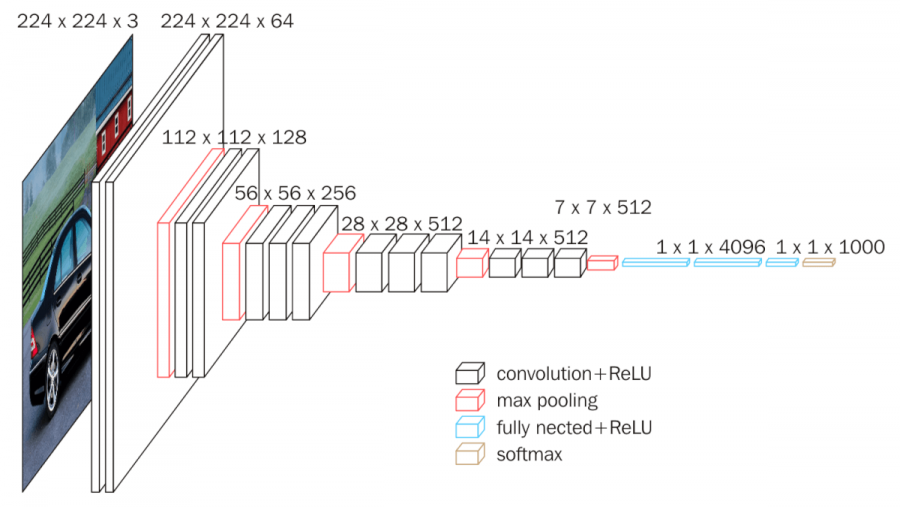

In [17]:
from IPython.display import Image
Image('/content/drive/My Drive/genderdata/vgg16.png')

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
folder_len = glob('/content/drive/My Drive/genderdata/Train/*')
folder_len

['/content/drive/My Drive/genderdata/Train/Woman',
 '/content/drive/My Drive/genderdata/Train/Man']

In [3]:
model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58892288/58889256 [==============================] - 0s 0us/step


In [4]:
for i in model.layers:
  i.trainable = False

In [5]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model,Sequential

In [6]:
x = Flatten()(model.output)
predict = Dense(len(folder_len),activation='softmax')(x)
vggmodel = Model(inputs = model.input,outputs = predict)
vggmodel.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [7]:
vggmodel.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(
                                   rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   shear_range = 0.2
                                   )
test_datagen = ImageDataGenerator(
                                  rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/genderdata/Train',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 32
                                                )
test_set = test_datagen.flow_from_directory(
                                            '/content/drive/My Drive/genderdata/Test',
                                            
                                            target_size = (224,224),
                                            class_mode = 'categorical',
                                            batch_size = 32
                                            )

Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [10]:
r = vggmodel.fit_generator(training_set,
                       steps_per_epoch = len(training_set),
                       epochs = 25,
                       validation_data = test_set,
                       validation_steps = len(test_set),
                       )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
13/13 [==============================] - 576s 44s/step - loss: 0.9744 - accuracy: 0.6150 - val_loss: 0.5028 - val_accuracy: 0.7750
Epoch 2/25
13/13 [==============================] - 6s 488ms/step - loss: 0.3200 - accuracy: 0.8550 - val_loss: 0.2842 - val_accuracy: 0.8875
Epoch 3/25
13/13 [==============================] - 6s 474ms/step - loss: 0.1601 - accuracy: 0.9300 - val_loss: 0.2131 - val_accuracy: 0.9175
Epoch 4/25
13/13 [==============================] - 6s 484ms/step - loss: 0.1299 - accuracy: 0.9600 - val_loss: 0.2046 - val_accuracy: 0.9225
Epoch 5/25
13/13 [==============================] - 6s 477ms/step - loss: 0.0964 - accuracy: 0.9675 - val_loss: 0.1867 - val_accuracy: 0.9275
Epoch 6/25
13/13 [==============================] - 6s 481ms/step - loss: 0.0925 - accuracy: 0.9700 - val_loss: 0.1795 - val_accuracy: 0.9350
Epoch 7/25
13/13 [==============================] - 6s 479ms/step - loss

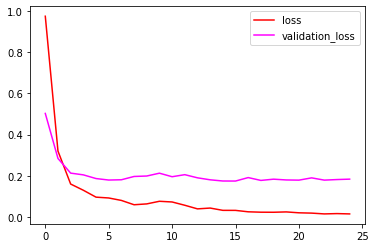

In [11]:
plt.plot(r.history['loss'],label = 'loss',color = 'red')
plt.plot(r.history['val_loss'],label = 'validation_loss',color = 'magenta')
plt.legend()
plt.show()

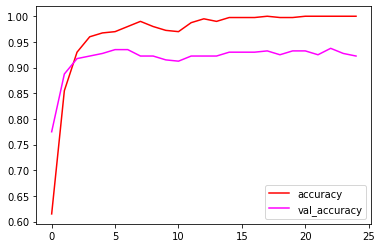

In [12]:
plt.plot(r.history['accuracy'],label = 'accuracy',color = 'red')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy',color = 'magenta')
plt.legend()
plt.show()

In [13]:
vggmodel.save('facerecogvgg.h5')

In [14]:
from tensorflow.keras.preprocessing import image

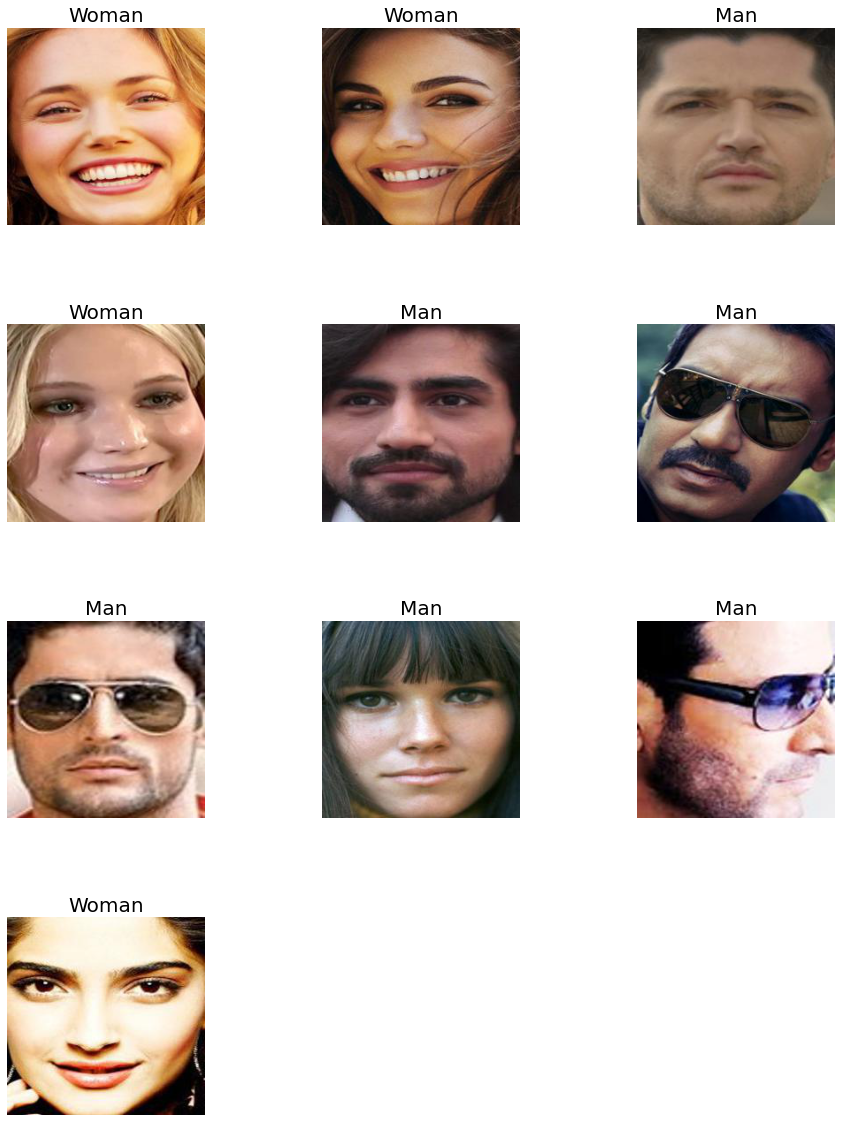

In [15]:
folder_path = '/content/drive/My Drive/genderdata/Validation_data'
image_list = os.listdir(folder_path)
fig = plt.figure(figsize = (16,20))
row = 4
col = 3
j = 0
for i in image_list:
  j+=1
  image1 = load_img(folder_path + '/' +i,target_size=(224,224))
  image_data = image.img_to_array(image1)
  image_data = np.expand_dims(image_data,axis = 0)
  label = vggmodel.predict(image_data)
  if label[0][0] == 1:
    k = 'Man'
  elif label[0][1] == 1:
    k = 'Woman'

  #print(label)
  fig.add_subplot(row,col,j)
  fig.subplots_adjust(hspace = .5)
  plt.imshow(image1)
  #stringprint = "%.1f" %round(label[2]*100,1)
  plt.title(k,fontsize = 20)
  plt.axis('off')
plt.show()